In [38]:
import copy
import json
import logging
import pickle
import time
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def load_indexes(filename):
        save_dir = os.path.join(os.getcwd(), f"indexes_results/{filename}")
        with open(os.path.join(save_dir, save_dir), "rb") as file:
            indexes = list(pickle.load(file))

        return indexes

# Create budget plots

In [109]:
indexes = load_indexes("epinions.pickle")
print(indexes[0])

['drop', {'budget_MB': 10000, 'max_index_width': 2, 'max_indexes': 4}, 187054.6400000093, {I(C review.i_id), I(C review.u_id), I(C trust.source_u_id), I(C useracct.u_id)}, 32.2, 3677.39168916968]


In [110]:
indexes = [[a, b["max_indexes"], c, d, e, f] for a, b, c, d, e, f in indexes] # Extract max_indexes param

In [111]:
df = pd.DataFrame(indexes, columns=["algo_name", "max_indexes", "cost", "indexes", "calc_time", "goodput"])[:24]
df.head(25)

,algo_name,max_indexes,cost,indexes,calc_time,goodput
0,drop,4,187054.64,"{I(C review.i_id), I(C review.u_id), I(C trust...",32.20,3677.391689
1,drop,6,146003.61,"{I(C review.i_id), I(C item.i_id), I(C useracc...",27.53,3809.246337
2,drop,8,145930.66,"{I(C review.i_id), I(C item.i_id), I(C useracc...",25.44,2960.501457
3,drop,10,144784.59,"{I(C review.i_id), I(C item.i_id), I(C useracc...",20.54,2994.609651
4,drop,15,141781.43,"{I(C review.i_id), I(C item.i_id), I(C useracc...",12.12,2967.369107
5,extend,4,134242.20,"[I(C useracct.u_id), I(C item.i_id), I(C trust...",64.47,3890.131783
6,extend,6,135929.03,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",65.78,3912.634851
7,extend,8,133254.49,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",62.10,3936.999675
8,extend,10,138732.28,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",65.07,3916.323683
9,extend,15,134815.61,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",64.81,3572.250795


In [112]:
# Normalize fields
df[["cost", "calc_time", "goodput"]] = df[["cost", "calc_time", "goodput"]].transform(lambda x: (x - x.mean()) / x.std())
df.head(10)

,algo_name,max_indexes,cost,indexes,calc_time,goodput
0,drop,4,3.361143,"{I(C review.i_id), I(C review.u_id), I(C trust...",-0.439098,0.113810
1,drop,6,0.472166,"{I(C review.i_id), I(C item.i_id), I(C useracc...",-0.551762,0.583277
2,drop,8,0.467032,"{I(C review.i_id), I(C item.i_id), I(C useracc...",-0.602184,-2.438666
3,drop,10,0.386377,"{I(C review.i_id), I(C item.i_id), I(C useracc...",-0.720397,-2.317224
4,drop,15,0.175029,"{I(C review.i_id), I(C item.i_id), I(C useracc...",-0.923531,-2.414214
5,extend,4,-0.355546,"[I(C useracct.u_id), I(C item.i_id), I(C trust...",0.339421,0.871268
6,extend,6,-0.236835,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",0.371025,0.951390
7,extend,8,-0.425057,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",0.282244,1.038140
8,extend,10,-0.039556,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",0.353896,0.964524
9,extend,15,-0.315192,"[I(C item.i_id), I(C useracct.u_id), I(C trust...",0.347623,-0.260542


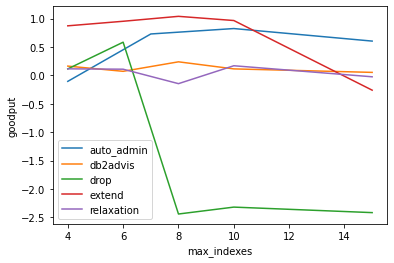

In [113]:
# goodput VS. max_index
df2 = df.set_index('max_indexes')
df2.groupby('algo_name')["goodput"].plot(legend=True)
plt.ylabel('goodput')
plt.savefig('./graphs/epinions_goodput_vs_maxindex.png')

In [ ]:
# goodput vs. cost
df2 = df.set_index('max_indexes')
df2["negative cost"] = -df2["cost"]
axes = df2.groupby('algo_name')[["goodput", "negative cost"]].plot(legend=True)

for i, ax in enumerate(axes):
  ax.set_title(axes.index[i])

# plt.ylabel('goodput')
# plt.savefig('./graphs/epinions_goodput_vs_calctime.png')

# indexjungle

In [105]:
indexes = load_indexes("indexjungle_budget.pickle")
print(indexes[0])

['extend', {'budget_MB': 3000, 'max_indexes': 8, 'max_index_width': 2, 'min_cost_improvement': 1.003}, 478900.749999999, [I(C jungle.int_field9,C jungle.uuid_field), I(C jungle.int_field8,C jungle.uuid_field), I(C jungle.int_field3,C jungle.uuid_field)], 101.83, 1348.3074560323707]


In [106]:
indexes = [[a, b["budget_MB"], c, d, e, f] for a, b, c, d, e, f in indexes] # Extract budget param
df = pd.DataFrame(indexes, columns=["algo_name", "budget_MB", "cost", "indexes", "calc_time", "goodput"])[:5]
df.head(25)

,algo_name,budget_MB,cost,indexes,calc_time,goodput
0,extend,3000,478900.75,"[I(C jungle.int_field9,C jungle.uuid_field), I...",101.83,1348.307456
1,extend,7000,1550565.93,"[I(C jungle.int_field8), I(C jungle.int_field3...",60.84,829.869553
2,extend,10000,1556613.69,"[I(C jungle.int_field3), I(C jungle.int_field5...",60.63,778.223980
3,extend,30000,1559363.66,"[I(C jungle.int_field5), I(C jungle.int_field8...",62.58,590.773419
4,extend,50000,1558242.64,"[I(C jungle.int_field9), I(C jungle.int_field0)]",47.84,626.584455


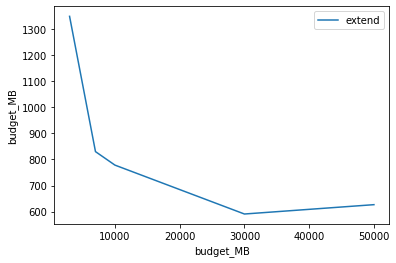

In [108]:
# goodput VS. max_index
df2 = df.set_index('budget_MB')
df2.groupby('algo_name')["goodput"].plot(legend=True)
plt.ylabel('budget_MB')
plt.savefig('./graphs/indexjungle_goodput_vs_budget.png')

In [114]:
indexes = load_indexes("indexjungle.pickle")
print(indexes[0])

['drop', {'budget_MB': 4000, 'max_index_width': 2, 'max_indexes': 6}, 1541308.3600000269, {I(C jungle.int_field0), I(C jungle.float_field3), I(C jungle.uuid_field), I(C jungle.int_field6), I(C jungle.int_field3), I(C jungle.float_field4)}, 33.53, 872.8096698873973]


In [115]:
indexes = [[a, b["max_indexes"], c, d, e, f] for a, b, c, d, e, f in indexes] # Extract budget param
df = pd.DataFrame(indexes, columns=["algo_name", "max_indexes", "cost", "indexes", "calc_time", "goodput"])[:19]
df.head(25)

,algo_name,max_indexes,cost,indexes,calc_time,goodput
0,drop,6,1541308.36,"{I(C jungle.int_field0), I(C jungle.float_fiel...",33.53,872.809670
1,drop,8,1549533.55,"{I(C jungle.float_field9), I(C jungle.int_fiel...",31.47,632.986653
2,drop,10,1539515.01,"{I(C jungle.float_field9), I(C jungle.float_fi...",21.34,852.080871
3,drop,15,1527504.13,"{I(C jungle.float_field9), I(C jungle.float_fi...",13.93,888.907580
4,extend,6,1524493.85,"[I(C jungle.int_field1), I(C jungle.int_field6...",60.29,640.904175
5,extend,8,1561034.44,"[I(C jungle.int_field9), I(C jungle.int_field0...",61.67,921.073378
6,extend,10,1541846.54,"[I(C jungle.int_field0), I(C jungle.int_field2...",61.75,870.131645
7,extend,15,1535466.95,"[I(C jungle.int_field4), I(C jungle.int_field0)]",47.54,804.675675
8,relaxation,6,1550216.33,"[I(C jungle.int_field0), I(C jungle.int_field9...",19.34,810.842280
9,relaxation,8,1549523.30,"[I(C jungle.int_field1,C jungle.float_field3),...",18.79,830.678297


In [116]:
# Normalize fields
df[["cost", "calc_time", "goodput"]] = df[["cost", "calc_time", "goodput"]].transform(lambda x: (x - x.mean()) / x.std())
df.head(10)

,algo_name,max_indexes,cost,indexes,calc_time,goodput
0,drop,6,-0.299630,"{I(C jungle.int_field0), I(C jungle.float_fiel...",-0.407979,0.053064
1,drop,8,0.529812,"{I(C jungle.float_field9), I(C jungle.int_fiel...",-0.430668,-0.565215
2,drop,10,-0.480475,"{I(C jungle.float_field9), I(C jungle.float_fi...",-0.542242,-0.000376
3,drop,15,-1.691672,"{I(C jungle.float_field9), I(C jungle.float_fi...",-0.623858,0.094565
4,extend,6,-1.995234,"[I(C jungle.int_field1), I(C jungle.int_field6...",-0.113238,-0.544803
5,extend,8,1.689582,"[I(C jungle.int_field9), I(C jungle.int_field0...",-0.098038,0.177491
6,extend,10,-0.245359,"[I(C jungle.int_field0), I(C jungle.int_field2...",-0.097157,0.046160
7,extend,15,-0.888688,"[I(C jungle.int_field4), I(C jungle.int_field0)]",-0.253669,-0.122590
8,relaxation,6,0.598665,"[I(C jungle.int_field0), I(C jungle.int_field9...",-0.564271,-0.106692
9,relaxation,8,0.528779,"[I(C jungle.int_field1,C jungle.float_field3),...",-0.570329,-0.055554


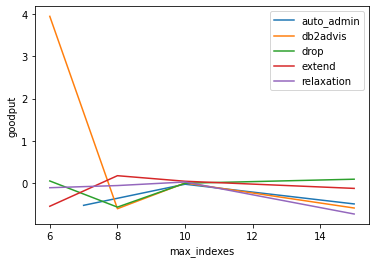

In [117]:
# goodput VS. max_index
df2 = df.set_index('max_indexes')
df2.groupby('algo_name')["goodput"].plot(legend=True)
plt.ylabel('goodput')
plt.savefig('./graphs/indexjungle_goodput_vs_maxindex.png')

# Timeseries

In [118]:
indexes = load_indexes("timeseries_budget.pickle")
print(indexes[0])

['extend', {'budget_MB': 3000, 'max_indexes': 10, 'max_index_width': 2, 'min_cost_improvement': 1.003}, 12480434.460000155, [I(C observations.type_id,C observations.source_id), I(C observations.session_id)], 64.88, 25.258136852173863]


In [119]:
indexes = [[a, b["budget_MB"], c, d, e, f] for a, b, c, d, e, f in indexes] # Extract budget param
df = pd.DataFrame(indexes, columns=["algo_name", "budget_MB", "cost", "indexes", "calc_time", "goodput"])[:5]
df.head(25)

,algo_name,budget_MB,cost,indexes,calc_time,goodput
0,extend,3000,12480434.46,"[I(C observations.type_id,C observations.sourc...",64.88,25.258137
1,extend,7000,12396288.38,"[I(C observations.type_id,C observations.sourc...",67.45,25.225917
2,extend,10000,12286677.87,"[I(C observations.type_id,C observations.sourc...",69.12,25.484049
3,extend,30000,12455722.82,"[I(C observations.type_id,C observations.sourc...",66.56,25.451891
4,extend,50000,12307496.05,"[I(C observations.type_id,C observations.sourc...",67.48,24.838653


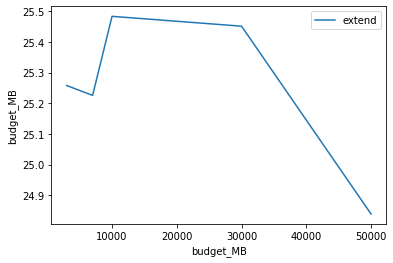

In [120]:
# goodput VS. max_index
df2 = df.set_index('budget_MB')
df2.groupby('algo_name')["goodput"].plot(legend=True)
plt.ylabel('budget_MB')
plt.savefig('./graphs/timeseries_goodput_vs_budget.png')

In [155]:
indexes1 = load_indexes("timeseries.pickle")[:19]
indexes2 = load_indexes("timeseries2.pickle")[:5]
indexes2[0][-1] = 224.89384169445057
indexes2[1][-1] = 24.866665065253436
indexes2[2][-1] = 219.29371768088566
indexes2[3][-1] = 218.97101130689072
indexes2[4][-1] = 226.42127697275336
indexes

indexes = indexes1 + indexes2
print(indexes[-1])

['relaxation', {'budget_MB': 5000, 'max_indexes': 20, 'max_index_width': 2, 'allowed_transformations': ['splitting', 'merging', 'prefixing', 'removal']}, 2376448.7399999867, [I(C observations.type_id), I(C observations.source_id,C observations.session_id), I(C observations.session_id), I(C observations.type_id,C observations.session_id), I(C observations.source_id,C observations.type_id)], 5.6, 226.42127697275336]


In [156]:
indexes = [[a, b["max_indexes"], c, d, e, f] for a, b, c, d, e, f in indexes] # Extract budget param
df = pd.DataFrame(indexes, columns=["algo_name", "max_indexes", "cost", "indexes", "calc_time", "goodput"])
df.head(25)

,algo_name,max_indexes,cost,indexes,calc_time,goodput
0,extend,10,1.248043e+07,"[I(C observations.type_id,C observations.sourc...",64.88,25.258137
1,extend,10,1.239629e+07,"[I(C observations.type_id,C observations.sourc...",67.45,25.225917
2,extend,10,1.228668e+07,"[I(C observations.type_id,C observations.sourc...",69.12,25.484049
3,extend,10,1.245572e+07,"[I(C observations.type_id,C observations.sourc...",66.56,25.451891
4,extend,10,1.230750e+07,"[I(C observations.type_id,C observations.sourc...",67.48,24.838653
5,drop,4,3.636285e+07,"{I(C observations.created_time), I(C observati...",19.67,22.000151
6,drop,6,3.664522e+07,"{I(C observations.created_time), I(C observati...",19.36,21.966056
7,drop,8,3.651628e+07,"{I(C observations.created_time), I(C observati...",19.10,22.419380
8,drop,10,3.647019e+07,"{I(C observations.created_time), I(C observati...",19.00,22.632809
9,drop,15,3.634527e+07,"{I(C observations.created_time), I(C observati...",18.84,22.516154


In [157]:
# Normalize fields
df[["cost", "calc_time", "goodput"]] = df[["cost", "calc_time", "goodput"]].transform(lambda x: (x - x.mean()) / x.std())
df.head(25)

,algo_name,max_indexes,cost,indexes,calc_time,goodput
0,extend,10,-0.230125,"[I(C observations.type_id,C observations.sourc...",1.052009,-0.457525
1,extend,10,-0.237243,"[I(C observations.type_id,C observations.sourc...",1.153151,-0.457957
2,extend,10,-0.246515,"[I(C observations.type_id,C observations.sourc...",1.218874,-0.454497
3,extend,10,-0.232215,"[I(C observations.type_id,C observations.sourc...",1.118125,-0.454928
4,extend,10,-0.244754,"[I(C observations.type_id,C observations.sourc...",1.154332,-0.463148
5,drop,4,1.790190,"{I(C observations.created_time), I(C observati...",-0.727232,-0.501194
6,drop,6,1.814077,"{I(C observations.created_time), I(C observati...",-0.739432,-0.501651
7,drop,8,1.803170,"{I(C observations.created_time), I(C observati...",-0.749664,-0.495575
8,drop,10,1.799271,"{I(C observations.created_time), I(C observati...",-0.753599,-0.492714
9,drop,15,1.788703,"{I(C observations.created_time), I(C observati...",-0.759896,-0.494277


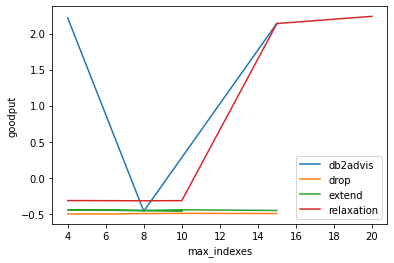

In [158]:
# goodput VS. max_index
df2 = df.set_index('max_indexes')
df2.groupby('algo_name')["goodput"].plot(legend=True)
plt.ylabel('goodput')
plt.savefig('./graphs/timeseries_goodput_vs_maxindex.png')

In [142]:
indexes = load_indexes("timeseries2.pickle")
indexes[0][-1] = 224.89384169445057
indexes[1][-1] = 24.866665065253436
indexes[2][-1] = 219.29371768088566
indexes[3][-1] = 218.97101130689072
indexes[4][-1] = 226.42127697275336

indexes[0]


['db2advis',
 {'max_index_width': 2,
  'budget_MB': 5000,
  'max_indexes': 4,
  'try_variations_seconds': 5,
  'try_variations_max_removals': 4},
 2361144.0399999954,
 [I(C observations.source_id,C observations.type_id),
  I(C observations.type_id),
  I(C observations.source_id,C observations.session_id),
  I(C observations.type_id,C observations.session_id)],
 12.92,
 224.89384169445057]

In [143]:
indexes = [[a, b["max_indexes"], c, d, e, f] for a, b, c, d, e, f in indexes] # Extract budget param
df = pd.DataFrame(indexes, columns=["algo_name", "max_indexes", "cost", "indexes", "calc_time", "goodput"])[:5]
df.head(25)

,algo_name,max_indexes,cost,indexes,calc_time,goodput
0,db2advis,4,2361144.04,"[I(C observations.source_id,C observations.typ...",12.92,224.893842
1,db2advis,8,2463865.17,"[I(C observations.type_id,C observations.sourc...",13.17,24.866665
2,db2advis,15,2269047.23,"[I(C observations.source_id,C observations.typ...",13.56,219.293718
3,relaxation,15,2356492.27,"[I(C observations.source_id,C observations.ses...",5.13,218.971011
4,relaxation,20,2376448.74,"[I(C observations.type_id), I(C observations.s...",5.60,226.421277
